#  MMAI 863 Assignment Classification
## John Kim 23MVD1 
## Fall 2023

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
#matplotlib notebook
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, recall_score, roc_auc_score, precision_score
import statsmodels.api as sm

Pretend that the data simulated represents the number of clients of a financial institution that default and cannot pay a line of credit.  The line of business manager requests to the team of data scientists to build a model to predict who will default.

The alerts generated by the model. all positives, are sent to a team of credit risk specialists who will make the final decision on which client will be underwritten the line of credit.

The manager of credit risk specialists does request that if an agent works ten alerts, at least one customer is found that is too risky.  The line of business does not want more than one percent of customers to default.

With the logistic model below, determine if the model is good enough to meet the business requriements and which threshold would you use to submit the alerts.

Not required for the assignment:  you can play with different class sepparations and weights to see the effect on the perfomance of the model.  You will notice that the more sparse positives are the more difficult for the model to catch positives.  Similarly, the lower the class sparation, the more diffcult for the model.



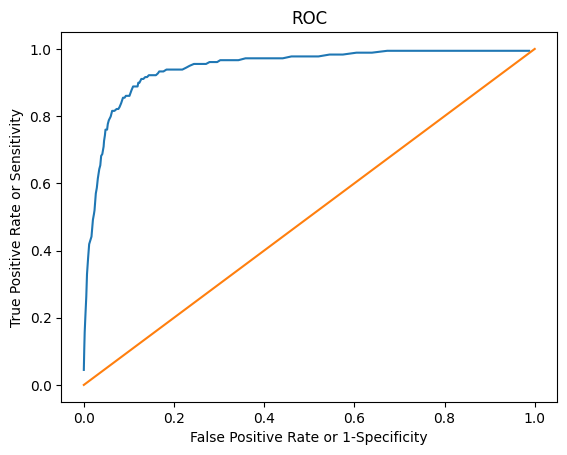

In [32]:
X, y = make_classification(
    n_classes=2, class_sep=1., weights=[0.95, 0.05],
    n_features=20, n_samples=10000, random_state=10
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)

sensitivity = []
fpr = []

TN = []
FP = []
FN = []
TP = []

#adding lists that were missing
THR = []
TPplusFP = []
Precision = []

for threshold in np.arange(0.001,.999,0.01):
    preds = np.where(clf.predict_proba(X_test)[:,1] > threshold, 1, 0)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
        
    sensitivity.append(tp/(tp+fn))
    fpr.append(fp / (fp+tn))

    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    THR.append(threshold)
    TPplusFP.append(tp+fp)
    Precision.append(tp/(tp+fp))


Confusion_Matrix = pd.DataFrame({
                        'Threshold': THR,
                        'TP': TP,
                        'TN': TN,
                        'FP': FP,
                        'FN': FN,  
                        #add here any ratio or totals that may help you.
                        'Recall': sensitivity,
                        'Precision': Precision,
                        'FPR': fpr
                        }
                        )


    
plt.plot(fpr,sensitivity)
plt.plot(np.arange(0,1.01,0.01),np.arange(0,1.01,0.01))
plt.title("ROC")
plt.xlabel("False Positive Rate or 1-Specificity")
plt.ylabel("True Positive Rate or Sensitivity")
plt.show()

In [33]:
Confusion_Matrix.head(5)

,Threshold,TP,TN,FP,FN,Recall,Precision,FPR
0,0.001,178,39,3082,1,0.994413,0.054601,0.987504
1,0.011,178,429,2692,1,0.994413,0.062021,0.862544
2,0.021,178,685,2436,1,0.994413,0.068095,0.780519
3,0.031,178,876,2245,1,0.994413,0.073463,0.719321
4,0.041,178,1021,2100,1,0.994413,0.078139,0.672861


In [47]:
Confusion_Matrix

,Threshold,TP,TN,FP,FN,Recall,Precision,FPR
0,0.001,178,39,3082,1,0.994413,0.054601,0.987504
1,0.011,178,429,2692,1,0.994413,0.062021,0.862544
2,0.021,178,685,2436,1,0.994413,0.068095,0.780519
3,0.031,178,876,2245,1,0.994413,0.073463,0.719321
4,0.041,178,1021,2100,1,0.994413,0.078139,0.672861
...,...,...,...,...,...,...,...,...
95,0.951,47,3104,17,132,0.262570,0.734375,0.005447
96,0.961,37,3110,11,142,0.206704,0.770833,0.003525
97,0.971,28,3115,6,151,0.156425,0.823529,0.001922
98,0.981,19,3118,3,160,0.106145,0.863636,0.000961


In [45]:
Confusion_Matrix[(Confusion_Matrix['FPR'] <= 0.01) & Confusion_Matrix['Recall'] >= 0.1 ]

,Threshold,TP,TN,FP,FN,Recall,Precision,FPR
93,0.931,68,3091,30,111,0.379888,0.693878,0.009612
94,0.941,59,3099,22,120,0.329609,0.728395,0.007049
95,0.951,47,3104,17,132,0.262570,0.734375,0.005447
96,0.961,37,3110,11,142,0.206704,0.770833,0.003525
97,0.971,28,3115,6,151,0.156425,0.823529,0.001922
98,0.981,19,3118,3,160,0.106145,0.863636,0.000961
99,0.991,8,3121,0,171,0.044693,1.000000,0.000000


Text(0.5, 1.0, 'Precision vs. Threshold')

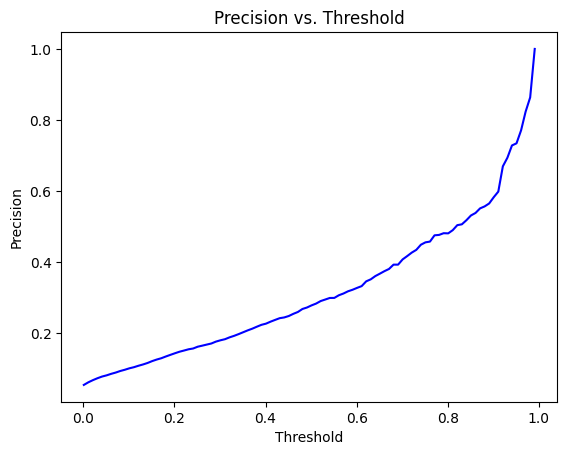

In [48]:
plt.plot(THR,Precision, label = 'Precision', color = 'blue')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold')

# Conclusion


Business Requirements:
a. The manager of credit risk specialists requests that if an agent works ten alerts, at least one customer is found that is too risky. This requirement suggests a need for a  high  Recall(TPR) to ensure that at least one truly risky customer is identified in a batch of ten alerts. (Sensitivity >= 0.10)

b. The line of business does not want more than one percent of customers to default. This implies a need for a low false positive rate (FPR) to minimize the number of false alarms. (FPR <= 0.0.1)

Based on these requirements, these are the thresholds found from the confusion matrix. These values match with the Precison vs Threshold plot generated.

| Threshold | TP |  TN  | FP | FN  |  Recall  | Precision |   FPR    |
|-----------|----|------|----|-----|----------|-----------|----------|
|     0.931 | 68 | 3091 | 30 | 111 | 0.379888 |  0.693878 | 0.009612 |
|     0.941 | 59 | 3099 | 22 | 120 | 0.329609 |  0.728395 | 0.007049 |
|     0.951 | 47 | 3104 | 17 | 132 | 0.262570 |  0.734375 | 0.005447 |
|     0.961 | 37 | 3110 | 11 | 142 | 0.206704 |  0.770833 | 0.003525 |
|     0.971 | 28 | 3115 |  6 | 151 | 0.156425 |  0.823529 | 0.001922 |
|    <b> 0.981</b> | 19 | 3118 |  3 | 160 | <b>0.106145</b> |  0.863636 | <b>0.000961</b> |

Based on this, we can select threshold = 0.981 which had recall rate above 10% and FPR below 1%

